# Ridge Regression

## Rückblick Lineare Regression

Lineare Regression: $\mathbf{y}=𝑏+w_1\mathbf{x}$

$\mathbf{x} \in \mathbb{R}^n$: Einflussgröße (Feature)  
$\mathbf{y} \in \mathbb{R}^n$: Zielvariable (Target)  
$n$: Anzahl der Trainingsinstanzen  
$b,w_1 \in \mathbb{R}$: Gewichte/Parameter  

Linear Regression Straffunktion (Loss) ist definiert als:  

$\mathcal{L}(\mathbf{w})= \sum_{i=1}^n \left[y_i - (b - \mathbf{w}^T \mathbf{x}_i) \right]^2$  

Zum lernen der unbekannten Gewichte $\mathbf{w}$ muss man die Straffunktion $\mathcal{L}$ minimieren. 

### Simuliere und Plotte Daten

In [1]:
#Importiere Python Libraries
%matplotlib inline
import pylab as pl
import seaborn as sns
sns.set(font_scale=1.7)

from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly.tools as tls
#Set to True
init_notebook_mode(connected=True)

import scipy as sp
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from ipywidgets import *
from IPython.display import display

#Funktion zum Plotten der Daten
def plot_data(X,y,model=None,interactive=False):
    fig = pl.figure(figsize=(10,6))
    pl.plot(X,y,'o',markersize=10)
    pl.xlabel("x")
    pl.ylabel("y")
    pl.title("")
    pl.ylim([-1.1,1.1])
    pl.xlim([-3.1,3.1])
    pl.xticks([-3,-2,-1,0,1,2,3],["50","60","70","80","90","100","110"])
    pl.yticks([-1,-0.5,0,0.5,1],["200k","400k","600k","800k","1M"])
    if not model==None:
        X_new=sp.linspace(-3, 3, 100).reshape(100, 1)
        y_new = model.predict(X_new)
        pl.plot(X_new,y_new,"r-",linewidth=4,label="Learned Regression Fit")
        pl.legend()
    if interactive:
        plotly_fig = tls.mpl_to_plotly(fig)
        iplot(plotly_fig, show_link=False)


#Funktion um Beispieldaten zu simulieren
def generate_data():
    sp.random.seed(42)
    X = sp.arange(-3,3,1.0/20.0).reshape(-1,1)
    y = sp.sin(0.2*sp.pi*X+0.1*sp.random.randn(X.shape[0],1))
    return X,y

def generate_polynomial_features(X,degree=1,return_transformer=True):
    transformer = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = transformer.fit_transform(X)
    if return_transformer:
        return X_poly, transformer
    else:
        return X_poly

#Generiere Daten
X,y = generate_data()
print X.shape
#Plotte Daten
plot_data(X,y,interactive=True);

(120, 1)


### Lerne Lineare Regression auf Daten

In [2]:
#Lerne Lineare Regression
print "Anzahl der Trainingsinstanzen:\t%d"%(X.shape[0])
print "Anzahl der Features:\t\t%d"%(X.shape[1])
model = LinearRegression()
model.fit(X,y)
#Plotte Daten und die gelernte Funktion
plot_data(X,y,model,interactive=True);

Anzahl der Trainingsinstanzen:	120
Anzahl der Features:		1


/Library/Python/2.7/site-packages/plotly/matplotlylib/renderer.py:384: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/Library/Python/2.7/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



<span style="color:orange">**Model beschreibt die zugrundeliegenden Daten nur schlecht -> Model ist Unterangepasst!**</span>

### Polynomiale Regression

Polynomiale Regression durch hinzufügen von Features höherer Ordnung, z.B. Polynom des 100. Grades:   

$\mathbf{y} = b + w_1 \mathbf{x}_1 + w_2 \mathbf{x}_1^2 + w_3 \mathbf{x}_1^3 + \dots + + w_2 \mathbf{x}_1^{100} $

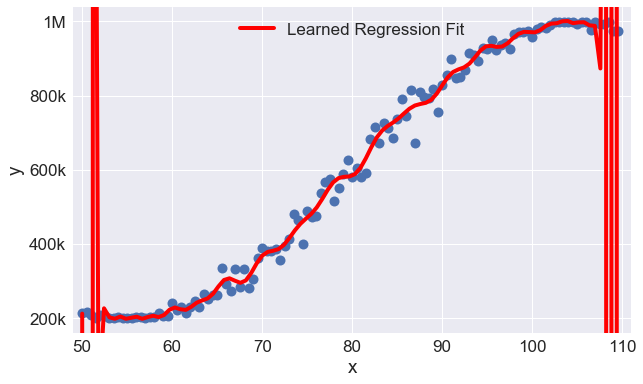

In [3]:
#Funktion um eine Polynomielle Regression unterschiedlichen Grades zu plotten
def render_polynomial_regression(degree=150):
    #Lerne Lineare Regression auf polynomiellen Features
    transformer = PolynomialFeatures(degree=degree, include_bias=False)
    scaler = StandardScaler()
    model = LinearRegression()

    #Polynomielle Regression mit Feature Scaling
    polynomial_regression = Pipeline((
        ('make_poly_features',transformer),
        ("scale_features",scaler),
        ("run_linreg",model),
    ))

    polynomial_regression.fit(X,y)
    #Plotte Daten und die gelernte Funktion
    plot_data(X,y,polynomial_regression)
    pl.show()

#Render einen Interaktiven Plot
#interact(render_polynomial_regression,degree=IntSlider(min=1,max=300,value=100,
#                                                       description="Grad des Polynoms:"));
render_polynomial_regression(degree=100)

<span style="color:orange">**Model beschreibt die Daten zu gut --> Model ist Üeberangepasst und führt zu einer schlechten Generalisierung!**</span>

## Einführung in Ridge Regression

Ridge Regression Loss ist definiert als:  

$\mathcal{L}_{Ridge}(\mathbf{w})=\frac{1}{n}\sum_{i=1}^n \left[y_i - (b - \mathbf{w}^T \mathbf{x}_i) \right]^2 + \underbrace{\alpha \Vert \mathbf{w}\Vert_2^2}_{Strafterm}$  

Zum lernen der unbekannten Gewichte $\mathbf{w}$ muss man die Straffunktion $\mathcal{L}_{Ridge}$ minimieren. 

In [4]:
#Lerne Ridge Regression auf polynomiellen Features mit alpha=1.1
ridge_regression = Pipeline((
    ('make_poly_features',PolynomialFeatures(degree=100, include_bias=False)),
    ("scale_features",StandardScaler()),
    ("run_ridgereg",Ridge(alpha=1.1)),
))

ridge_regression.fit(X,y)

plot_data(X,y,ridge_regression,interactive=True)

<span style="color:green">**Optimale Abwägung zwischen zu einfachem und zu komplexem Model durch L2-Regularisierung!
**</span>

### Effekt von $\alpha$ auf die Gewichte

In [5]:
#Funktion um den Effekt von alpha auf die Gewichte zu illustrieren
def plot_effect_of_alpha(interactive=False):
    coefs = []
    alphas = sp.logspace(5,-6,200)
    poly_feat = PolynomialFeatures(degree=10, include_bias=False)
    scaler = StandardScaler()
    for alpha in alphas:
        model = Ridge(alpha=alpha)
        ridge_regression = Pipeline((
            ('make_poly_features',poly_feat),
            ("scale_features",scaler),
            ("run_ridgereg",model),
        ))

        ridge_regression.fit(X,y)

        X_new=sp.linspace(-3, 3, 100).reshape(100, 1)
        y_new = ridge_regression.predict(X_new)
        coefs.append(model.coef_.flatten()[1:])
    fig = pl.figure(figsize=(10,6))
    ax = pl.gca()
    ax.plot(alphas, coefs,linewidth=3)
    ax.set_xscale('log')
    if interactive:
        pl.xlabel("alpha")
    else:
        pl.xlabel('$\\alpha$')
    pl.ylabel('Gewichte')
    pl.axis('tight')
    if interactive:
        pl.xticks(fontsize=13)
        plotly_fig = tls.mpl_to_plotly(fig)
        iplot(plotly_fig, show_link=False)
    else:
        pl.show()
#Plot Effect of Alpha
plot_effect_of_alpha(interactive=True);